In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [2]:
#定义变量 
thermal_power_station_strategy=np.zeros(shape=(4,1000)) 
wind_power_station_strategy=np.zeros(shape=(2,1000))
c_wind_speed= np.loadtxt("./data/c_wind_speed_uniform_distribution_(3,25).txt")      
kappa_wind_speed= np.loadtxt("./data/kappa_wind_speed_uniform_distribution_(2,3).txt")  
d_power_demand=np.loadtxt("./data/d_power_demand_normal_distribution_(70,5).txt") #时变的需求侧用电需求  阶梯式变化 
thermal_power_station_dual_variable=np.zeros(shape=(4,1000))
wind_power_station_dual_variable=np.zeros(shape=(2,1000))#两个风力发电站中有一个是受到拜占庭攻击的 假设第二个风力发电站是受到攻击的
E=np.loadtxt("6_Network_Topology_Double_Random_Adjacency_Matrix.txt")
thermal_power_station_cost=np.zeros(shape=(1,1000)) #火力发电成本
wind_power_station_cost=np.zeros(shape=(1,1000)) #风力发电成本
sum_cost=np.zeros(shape=(1,1000)) #总发电成本
#thermal_power_station_eta=[0.0375,0.0375,0.0625,0.035]
thermal_power_station_eta=[0.0675,0.0675,0.0925,0.0625]
thermal_power_station_zeta=[2,1.75,1,3]
thermal_power_station_xi=[0,0,0,0]
thermal_power_station_P_min=[50,20,15,10]
thermal_power_station_P_max=[200,120,80,100]
#wind_power_station_varphi=[3,6]
wind_power_station_varphi=[1,6]
wind_power_station_v_in=[3,5]
wind_power_station_v_out=[25,25]
wind_power_station_v_r=[13,15]
wind_power_station_sigma_ue=[5,5]
wind_power_station_sigma_oe=[30,20]
wind_power_station_P_r=[160,160]
wind_power_station_P_min=[0,0]
wind_power_station_P_max=[160,160]
sum_thermal_wind_power_station_strategy=np.zeros(shape=(1,1000))
step_size_primal=1
step_size_dual=1
regularization_parameter=0.001
small_Gaussian_Byzantine_attack=np.loadtxt("./data/small_Gaussian_Byzantine_attack_(-150,5).txt")

In [3]:
#火力，风力发电策略初始化
thermal_power_station_strategy[0][0]=0
thermal_power_station_strategy[1][0]=0
thermal_power_station_strategy[2][0]=0
thermal_power_station_strategy[3][0]=0
wind_power_station_strategy[0][0]=0
wind_power_station_strategy[1][0]=0
#初始总发电策略
sum_thermal_wind_power_station_strategy[0][0]=0
#初始化受到攻击的风力发电站的对偶变量
wind_power_station_dual_variable[1][0]=small_Gaussian_Byzantine_attack[0]

#安全发电站的初始总发电成本
#火力发电成本
for i in range(0,4):
    thermal_power_station_cost[0][0]=thermal_power_station_cost[0][0]+thermal_power_station_eta[i]*thermal_power_station_strategy[i][0]*thermal_power_station_strategy[i][0]+thermal_power_station_zeta[i]*thermal_power_station_strategy[i][0]
#风力发电成本
for i in range(0,1):
    wind_power_station_cost[0][0]=wind_power_station_cost[0][0]+wind_power_station_varphi[i]*wind_power_station_strategy[i][0]+wind_power_station_sigma_ue[i]*((wind_power_station_P_r[i]-wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*c_wind_speed[0]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[0],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))*sc.gamma(1+1/kappa_wind_speed[0])-sc.gammaincc(1+1/kappa_wind_speed[0],math.pow(wind_power_station_v_r[i]/c_wind_speed[0],kappa_wind_speed[0]))*sc.gamma(1+1/kappa_wind_speed[0])))+wind_power_station_sigma_oe[i]*((wind_power_station_strategy[i][0])*(1-math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))+math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*c_wind_speed[0]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[0],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))*sc.gamma(1+1/kappa_wind_speed[0])-sc.gammaincc(1+1/kappa_wind_speed[0],math.pow(wind_power_station_v_in[i]/c_wind_speed[0],kappa_wind_speed[0]))*sc.gamma(1+1/kappa_wind_speed[0])))
#发电总成本
sum_cost[0][0]=thermal_power_station_cost[0][0]+wind_power_station_cost[0][0]


In [4]:
def Byzantine_attack_decentralized_economic_dispatch(thermal_power_station_strategy,wind_power_station_strategy,c_wind_speed,kappa_wind_speed,d_power_demand,thermal_power_station_dual_variable,wind_power_station_dual_variable,E,thermal_power_station_cost,wind_power_station_cost,thermal_power_station_eta,thermal_power_station_zeta,thermal_power_station_P_min,thermal_power_station_P_max,wind_power_station_varphi,wind_power_station_sigma_ue,wind_power_station_sigma_oe,wind_power_station_P_min,wind_power_station_P_max,sum_thermal_wind_power_station_strategy,step_size_primal,step_size_dual):
    #显示初始化的数据
    #输出初始状态的原变量和对偶变量
    print("***************************attack_free_online_decentralized_economic_dispatch*****************************")
    print("相关变量初始值为：")
    for i in range (0,4):
        print("第",(i+1),"个火力发电站的初始计划发电量为:",thermal_power_station_strategy[i][0])
    for i in range (0,2):
        print("第",(i+5),"个风力发电站的初始计划发电量为:",wind_power_station_strategy[i][0])
    print("****************************************************************************")
    for i in range (0,4):
        print("第",(i+1),"个火力发电站的初始对偶变量为:",thermal_power_station_dual_variable[i][0])
    for i in range (0,1):
        print("第",(i+5),"个风力发电站的初始对偶变量为:",wind_power_station_dual_variable[i][0])
    print("****************************************************************************")
    print("第",(6),"个受到Byzantin攻击的风力发电站的初始对偶变量为:",wind_power_station_dual_variable[1][0])
    print("****************************************************************************")
    print("安全发电站的初始总发电量:",sum_thermal_wind_power_station_strategy[0][0])
    print("*************************")
    print("需求侧平均用电需求:",d_power_demand[0])
    print("****************************************************************************")
    print("风速分布参数c:",c_wind_speed[0])
    print("****************************************************************************")
    print("风速分布参数kappa:",kappa_wind_speed[0])
    print("****************************************************************************")
    print("安全发电站的总发电成本：", sum_cost[0][0])
    print("****************************************************************************")
    print("原变量迭代步长为:",step_size_primal)
    print("*****************************************************************************")
    print("对偶变量迭代步长为:",step_size_dual)
    print("*****************************************************************************")
    
    #开始迭代
    for k in range(1,1000):
        #发电站更新计划发电量和对偶变量
        #对偶变量 先做梯度上升 再做聚合
        #安全发电站的梯度上升
        dual_variable_intermediate=[] #存放当前迭代中6个用户对对偶变量做完梯度下降后得到的中间值
        for i in range(0,4):
            dual_variable_intermediate.append(thermal_power_station_dual_variable[i][k-1]+step_size_dual*((1/6)*thermal_power_station_strategy[i][k-1]-(1/6)*d_power_demand[k-1]-regularization_parameter*thermal_power_station_dual_variable[i][k-1]))
        for j in range(0,1):
            dual_variable_intermediate.append(wind_power_station_dual_variable[j][k-1]+step_size_dual*((1/6)*wind_power_station_strategy[j][k-1]-(1/6)*d_power_demand[k-1]-regularization_parameter*wind_power_station_dual_variable[j][k-1]))
        #受到攻击的风力发电站的对偶值
        dual_variable_intermediate.append(wind_power_station_dual_variable[1][k-1])
        #聚合 安全的火力发电站的对偶更新
        for i in range(0,4):
            weight_aggregation_dual_variable=0
            for j in range(0,4):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i][j]*dual_variable_intermediate[j]               
            for j in range(0,2):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i][j+4]*dual_variable_intermediate[j+4]
            thermal_power_station_dual_variable[i][k]=weight_aggregation_dual_variable
        #聚合 安全的风力发电站的对偶更新
        for i in range(0,1):
            weight_aggregation_dual_variable=0
            for j in range(0,4):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i+4][j]*dual_variable_intermediate[j]               
            for j in range(0,2):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i+4][j+4]*dual_variable_intermediate[j+4]
            wind_power_station_dual_variable[i][k]=weight_aggregation_dual_variable
        #受到Byzantine攻击的风力发电站的对偶更新
        wind_power_station_dual_variable[1][k]=small_Gaussian_Byzantine_attack[k]          
        
        #安全的火力发电站计划发电量
        for i in range(0,4):
            thermal_power_station_strategy[i][k]=thermal_power_station_strategy[i][k-1]-step_size_primal*(2*thermal_power_station_eta[i]*thermal_power_station_strategy[i][k-1]+thermal_power_station_zeta[i]+(1/6)*thermal_power_station_dual_variable[i][k-1]) 
            if thermal_power_station_strategy[i][k]<=thermal_power_station_P_min[i]:
                thermal_power_station_strategy[i][k]=thermal_power_station_P_min[i]
            elif thermal_power_station_strategy[i][k]>=thermal_power_station_P_max[i]:
                thermal_power_station_strategy[i][k]=thermal_power_station_P_max[i]
        #安全的风力发电站计划发电量
        for i in range(0,1):
            wind_power_station_strategy[i][k]=wind_power_station_strategy[i][k-1]-step_size_primal*(wind_power_station_varphi[i]+wind_power_station_sigma_oe[i]+(wind_power_station_sigma_ue[i]+wind_power_station_sigma_oe[i])*math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k-1]))/(math.pow(c_wind_speed[k-1],kappa_wind_speed[k-1])))+(-wind_power_station_sigma_ue[i]-wind_power_station_sigma_oe[i])*math.exp(-(math.pow((wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k-1])/wind_power_station_P_r[i]),kappa_wind_speed[k-1]))/(math.pow(c_wind_speed[k-1],kappa_wind_speed[k-1])))+(1/6)*wind_power_station_dual_variable[i][k-1])
            if wind_power_station_strategy[i][k]<=wind_power_station_P_min[i]:
                wind_power_station_strategy[i][k]=wind_power_station_P_min[i]
            elif wind_power_station_strategy[i][k]>=wind_power_station_P_max[i]:
                wind_power_station_strategy[i][k]=wind_power_station_P_max[i]
        #受到Byzantine攻击的风力发电站的计划发电量
        wind_power_station_strategy[1][k]=wind_power_station_strategy[1][k-1]
        
        #安全发电站的计算总计划发电
        #火力发电量
        for i in range(0,4):
            sum_thermal_wind_power_station_strategy[0][k]=sum_thermal_wind_power_station_strategy[0][k]+thermal_power_station_strategy[i][k]
        #风力发电量
        for i in range(0,1):
            sum_thermal_wind_power_station_strategy[0][k]=sum_thermal_wind_power_station_strategy[0][k]+wind_power_station_strategy[i][k]
        
        #安全发电站的计算总发电成本
        #火力发电成本
        for i in range(0,4):
            thermal_power_station_cost[0][k]=thermal_power_station_cost[0][k]+thermal_power_station_eta[i]*thermal_power_station_strategy[i][k]*thermal_power_station_strategy[i][k]+thermal_power_station_zeta[i]*thermal_power_station_strategy[i][k]
        #风力发电成本
        for i in range(0,1):
            wind_power_station_cost[0][k]=wind_power_station_cost[0][k]+wind_power_station_varphi[i]*wind_power_station_strategy[i][k]+wind_power_station_sigma_ue[i]*((wind_power_station_P_r[i]-wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*c_wind_speed[k]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[k],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))*sc.gamma(1+1/kappa_wind_speed[k])-sc.gammaincc(1+1/kappa_wind_speed[k],math.pow(wind_power_station_v_r[i]/c_wind_speed[k],kappa_wind_speed[k]))*sc.gamma(1+1/kappa_wind_speed[k])))+wind_power_station_sigma_oe[i]*((wind_power_station_strategy[i][k])*(1-math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))+math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*c_wind_speed[k]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[k],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))*sc.gamma(1+1/kappa_wind_speed[k])-sc.gammaincc(1+1/kappa_wind_speed[k],math.pow(wind_power_station_v_in[i]/c_wind_speed[k],kappa_wind_speed[k]))*sc.gamma(1+1/kappa_wind_speed[k])))
        #发电总成本
        sum_cost[0][k]=thermal_power_station_cost[0][k]+wind_power_station_cost[0][k]
        
        #输出第k次迭代中的结果 每间隔10次迭代输出一次结果
        #if (k+1)%10==0:
        print(k,"次迭代中的结果：")
        for i in range (0,4):
            print("第",(i+1),"个火力发电站的计划发电量为:",thermal_power_station_strategy[i][k])
        for i in range (0,2):
            print("第",(i+5),"个风力发电站的计划发电量为:",wind_power_station_strategy[i][k])
        print("****************************************************************************")
        for i in range (0,4):
            print("第",(i+1),"个火力发电站的对偶变量为:",thermal_power_station_dual_variable[i][k])
        for i in range (0,1):
            print("第",(i+5),"个风力发电站的对偶变量为:",wind_power_station_dual_variable[i][k])
        print("****************************************************************************")
        print("第",(6),"个受到Byzantin攻击的风力发电站的初始对偶变量为:",wind_power_station_dual_variable[1][k])
        print("****************************************************************************")
        print("安全发电站的总发电量:",sum_thermal_wind_power_station_strategy[0][k])
        print("*************************")
        print("需求侧平均用电需求:",d_power_demand[k])
        print("****************************************************************************")
        print("风速分布参数c:",c_wind_speed[k])
        print("****************************************************************************")
        print("风速分布参数kappa:",kappa_wind_speed[k])
        print("****************************************************************************")        
        print("安全发电站的总发电成本：", sum_cost[0][k])
        print("****************************************************************************")
        print("原变量迭代步长为:",step_size_primal)
        print("****************************************************************************")
        print("对偶变量迭代步长为:",step_size_dual)
        print("****************************************************************************")
        
        #step_size_primal=(pow(k+1,0.1))
        #step_size_dual=1/(pow(k+1,0.7))#我们发现在在线算法中 不能使用太小的对偶步长 不然后续算法对在线变化会不敏感 
        
        '''#尝试使用两阶段的步长
        if k<=500:
            step_size_dual=1/(pow(k+1,0.7))
        else:
            step_size_dual=0.1'''

    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
    return None  

In [5]:
Byzantine_attack_decentralized_economic_dispatch(thermal_power_station_strategy,wind_power_station_strategy,c_wind_speed,kappa_wind_speed,d_power_demand,thermal_power_station_dual_variable,wind_power_station_dual_variable,E,thermal_power_station_cost,wind_power_station_cost,thermal_power_station_eta,thermal_power_station_zeta,thermal_power_station_P_min,thermal_power_station_P_max,wind_power_station_varphi,wind_power_station_sigma_ue,wind_power_station_sigma_oe,wind_power_station_P_min,wind_power_station_P_max,sum_thermal_wind_power_station_strategy,step_size_primal,step_size_dual)

***************************attack_free_online_decentralized_economic_dispatch*****************************
相关变量初始值为：
第 1 个火力发电站的初始计划发电量为: 0.0
第 2 个火力发电站的初始计划发电量为: 0.0
第 3 个火力发电站的初始计划发电量为: 0.0
第 4 个火力发电站的初始计划发电量为: 0.0
第 5 个风力发电站的初始计划发电量为: 0.0
第 6 个风力发电站的初始计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的初始对偶变量为: 0.0
第 2 个火力发电站的初始对偶变量为: 0.0
第 3 个火力发电站的初始对偶变量为: 0.0
第 4 个火力发电站的初始对偶变量为: 0.0
第 5 个风力发电站的初始对偶变量为: 0.0
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -149.59297205
****************************************************************************
安全发电站的初始总发电量: 0.0
*************************
需求侧平均用电需求: 72.62781256
****************************************************************************
风速分布参数c: 8.301041
****************************************************************************
风速分布参数kappa: 2.66836324
************************************************************************

安全发电站的总发电成本： 5571.436998662108
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
31 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 103.84043413067008
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 96.14534635996452
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -94.1076818505141
第 2 个火力发电站的对偶变量为: -109.23206287366699
第 3 个火力发电站的对偶变量为: -108.67645999367863
第 4 个火力发电站的对偶变量为: -121.68533413791415
第 5 个风力发电站的对偶变量为: -94.07402303450675
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -142.53154216
****************************************************************************
安全发电站的总发电量: 499.9857804906346
*************************
需求侧平均用电需

第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 105.84559838242076
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -90.80052387162306
第 2 个火力发电站的对偶变量为: -107.80167392267298
第 3 个火力发电站的对偶变量为: -107.28060337736127
第 4 个火力发电站的对偶变量为: -121.60543836280497
第 5 个风力发电站的对偶变量为: -90.77310397192315
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -143.16058607
****************************************************************************
安全发电站的总发电量: 499.3880518566859
*************************
需求侧平均用电需求: 70.95667017
****************************************************************************
风速分布参数c: 5.26250906
****************************************************************************
风速分布参数kappa: 2.33337829
****************************************************************************
安全发电站的总发电成本： 5933.407179675638
***************************************

第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -147.32378495
****************************************************************************
安全发电站的总发电量: 546.7687802899486
*************************
需求侧平均用电需求: 62.79735749
****************************************************************************
风速分布参数c: 15.60816695
****************************************************************************
风速分布参数kappa: 2.27330299
****************************************************************************
安全发电站的总发电成本： 4910.745456506662
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
71 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 95.10818548255041
第 2 个火力发电站的计划发电量为: 117.9831560471375
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 152.73472497193524
第 6 个风力发电站的计划发电量为: 0.0
**************************************

第 3 个火力发电站的对偶变量为: -110.07291696631904
第 4 个火力发电站的对偶变量为: -123.32183476111646
第 5 个风力发电站的对偶变量为: -94.73248366048577
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -147.6310928
****************************************************************************
安全发电站的总发电量: 504.16370369054886
*************************
需求侧平均用电需求: 70.38155319
****************************************************************************
风速分布参数c: 24.12858644
****************************************************************************
风速分布参数kappa: 2.8841721
****************************************************************************
安全发电站的总发电成本： 5009.5903856699715
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
91 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 98.0556817462

第 1 个火力发电站的计划发电量为: 94.79029785530297
第 2 个火力发电站的计划发电量为: 116.71193307723443
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 95.37503477707901
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -93.79122182267132
第 2 个火力发电站的对偶变量为: -108.11878930782675
第 3 个火力发电站的对偶变量为: -107.61687544075593
第 4 个火力发电站的对偶变量为: -119.57518695734196
第 5 个风力发电站的对偶变量为: -93.8636912285943
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -144.38827364
****************************************************************************
安全发电站的总发电量: 486.8772657096164
*************************
需求侧平均用电需求: 78.3849955
****************************************************************************
风速分布参数c: 4.16017458
****************************************************************************
风速分布参数kappa: 2.15085496
***************************************************************************

第 1 个火力发电站的对偶变量为: -94.46520549230598
第 2 个火力发电站的对偶变量为: -110.85382720799262
第 3 个火力发电站的对偶变量为: -110.29822535737587
第 4 个火力发电站的对偶变量为: -124.14955441814618
第 5 个风力发电站的对偶变量为: -94.36648090141279
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -147.3746475
****************************************************************************
安全发电站的总发电量: 520.8796647207298
*************************
需求侧平均用电需求: 68.31510475
****************************************************************************
风速分布参数c: 15.37789351
****************************************************************************
风速分布参数kappa: 2.72422256
****************************************************************************
安全发电站的总发电成本： 4440.016439349425
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -97.72788355443103
第 2 个火力发电站的对偶变量为: -112.1106511750378
第 3 个火力发电站的对偶变量为: -111.55504905855607
第 4 个火力发电站的对偶变量为: -123.35088115392512
第 5 个风力发电站的对偶变量为: -97.7457481263185
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -152.86195592
****************************************************************************
安全发电站的总发电量: 513.0687432121956
*************************
需求侧平均用电需求: 65.03354073
****************************************************************************
风速分布参数c: 16.78592751
****************************************************************************
风速分布参数kappa: 2.52647713
****************************************************************************
安全发电站的总发电成本： 4506.649276422924
****************************************************************************
原变量迭代步长为: 1
**************************************

第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 92.20740159238015
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -95.26219021323327
第 2 个火力发电站的对偶变量为: -111.75532737850702
第 3 个火力发电站的对偶变量为: -111.19972435283503
第 4 个火力发电站的对偶变量为: -124.39576516896335
第 5 个风力发电站的对偶变量为: -95.46131591135435
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -153.1160016
****************************************************************************
安全发电站的总发电量: 490.8394714780915
*************************
需求侧平均用电需求: 63.59882158
****************************************************************************
风速分布参数c: 12.34321841
****************************************************************************
风速分布参数kappa: 2.71927432
****************************************************************************
安全发电站的总发电成本： 4285.841711823761
***************

第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 139.63519980829082
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -90.92516366762706
第 2 个火力发电站的对偶变量为: -106.40014758922753
第 3 个火力发电站的对偶变量为: -105.86514405716652
第 4 个火力发电站的对偶变量为: -119.53111357420903
第 5 个风力发电站的对偶变量为: -90.46945459036726
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -148.0804581
****************************************************************************
安全发电站的总发电量: 535.6878011985723
*************************
需求侧平均用电需求: 64.54684515
****************************************************************************
风速分布参数c: 12.52832295
****************************************************************************
风速分布参数kappa: 2.37897168
****************************************************************************
安全发电站的总发电成本： 4905.058782122565
***************************************************************

第 5 个风力发电站的对偶变量为: -86.40340563093581
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -148.75796696
****************************************************************************
安全发电站的总发电量: 499.36941331369246
*************************
需求侧平均用电需求: 63.83895242
****************************************************************************
风速分布参数c: 21.70193408
****************************************************************************
风速分布参数kappa: 2.08953573
****************************************************************************
安全发电站的总发电成本： 4843.642590070985
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
231 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 91.83591178261541
第 2 个火力发电站的计划发电量为: 115.36471999536059
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力

需求侧平均用电需求: 74.88019393
****************************************************************************
风速分布参数c: 7.25325905
****************************************************************************
风速分布参数kappa: 2.28010355
****************************************************************************
安全发电站的总发电成本： 5479.3610582227
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
253 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 102.54415565571787
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 97.6532232731216
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -95.24661767816984
第 2 个火力发电站的对偶变量为: -108.968847235308
第 3 个火力发电站的对偶变量为: -108.41324538469115
第 4 个火力发电站的对偶变量为: -120.4083458144644
第 5 个风力发

第 1 个火力发电站的对偶变量为: -84.88625264608967
第 2 个火力发电站的对偶变量为: -103.44013419626106
第 3 个火力发电站的对偶变量为: -102.91705850351377
第 4 个火力发电站的对偶变量为: -119.37672440119306
第 5 个风力发电站的对偶变量为: -84.44343938004849
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -150.03110487
****************************************************************************
安全发电站的总发电量: 518.8045714084026
*************************
需求侧平均用电需求: 59.41836689
****************************************************************************
风速分布参数c: 15.70487747
****************************************************************************
风速分布参数kappa: 2.98740162
****************************************************************************
安全发电站的总发电成本： 4228.661276494793
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
**********************************************

第 2 个火力发电站的对偶变量为: -108.61278827843768
第 3 个火力发电站的对偶变量为: -108.08070107335303
第 4 个火力发电站的对偶变量为: -119.71788358390529
第 5 个风力发电站的对偶变量为: -94.65168116617998
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -152.41154576
****************************************************************************
安全发电站的总发电量: 492.1185254049525
*************************
需求侧平均用电需求: 66.42137964
****************************************************************************
风速分布参数c: 9.67729724
****************************************************************************
风速分布参数kappa: 2.2861422
****************************************************************************
安全发电站的总发电成本： 4627.257122433904
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
295 次迭代中

第 4 个火力发电站的对偶变量为: -125.05843916349016
第 5 个风力发电站的对偶变量为: -96.02350170204214
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -151.70579143
****************************************************************************
安全发电站的总发电量: 510.9642125656709
*************************
需求侧平均用电需求: 63.22745473
****************************************************************************
风速分布参数c: 22.9635419
****************************************************************************
风速分布参数kappa: 2.76383198
****************************************************************************
安全发电站的总发电成本： 5003.992658019466
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
316 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 105.19005048945259
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -86.33830200065462
第 2 个火力发电站的对偶变量为: -104.48392827177258
第 3 个火力发电站的对偶变量为: -103.96156355232146
第 4 个火力发电站的对偶变量为: -119.45381699235577
第 5 个风力发电站的对偶变量为: -86.0312674788764
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -149.21878876
****************************************************************************
安全发电站的总发电量: 508.1759323624823
*************************
需求侧平均用电需求: 69.18553669
****************************************************************************
风速分布参数c: 15.3387833
****************************************************************************
风速分布参数kappa: 2.06174959
****************************************************************************
安全发电站的总发电成本： 4585.160563589219
****************************************************************************
原变量迭代步长为: 1
**************************************

****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
370 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 105.90262410209088
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 119.13026667914087
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -96.37067740769433
第 2 个火力发电站的对偶变量为: -110.41545273583996
第 3 个火力发电站的对偶变量为: -109.8598508852232
第 4 个火力发电站的对偶变量为: -122.09883303965387
第 5 个风力发电站的对偶变量为: -96.29088702592797
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -150.89331002
****************************************************************************
安全发电站的总发电量: 525.0328907812318
*************************
需求侧平均用电需求: 73.83640788
**************

第 3 个火力发电站的对偶变量为: -104.10869529877337
第 4 个火力发电站的对偶变量为: -119.97970067996162
第 5 个风力发电站的对偶变量为: -86.01736236969434
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -152.42428279
****************************************************************************
安全发电站的总发电量: 519.2443409205549
*************************
需求侧平均用电需求: 66.7460756
****************************************************************************
风速分布参数c: 15.25962676
****************************************************************************
风速分布参数kappa: 2.78401552
****************************************************************************
安全发电站的总发电成本： 4283.186917179022
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
394 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 92.3384542881

第 1 个火力发电站的对偶变量为: -95.87572586667548
第 2 个火力发电站的对偶变量为: -109.27842143235213
第 3 个火力发电站的对偶变量为: -108.72242182839457
第 4 个火力发电站的对偶变量为: -120.27715197909761
第 5 个风力发电站的对偶变量为: -95.85036989649348
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -154.49016274
****************************************************************************
安全发电站的总发电量: 498.8447474594787
*************************
需求侧平均用电需求: 66.01198165
****************************************************************************
风速分布参数c: 18.6837591
****************************************************************************
风速分布参数kappa: 2.15087552
****************************************************************************
安全发电站的总发电成本： 4656.359651518352
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -86.26642365077207
第 2 个火力发电站的对偶变量为: -103.43916488909964
第 3 个火力发电站的对偶变量为: -102.92279239847484
第 4 个火力发电站的对偶变量为: -117.41032460416037
第 5 个风力发电站的对偶变量为: -86.07349454771152
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -145.47976584
****************************************************************************
安全发电站的总发电量: 509.0260644088464
*************************
需求侧平均用电需求: 72.64891076
****************************************************************************
风速分布参数c: 15.58643927
****************************************************************************
风速分布参数kappa: 2.05262184
****************************************************************************
安全发电站的总发电成本： 4599.894901168606
****************************************************************************
原变量迭代步长为: 1
************************************

****************************************************************************
第 1 个火力发电站的对偶变量为: -93.03308254105573
第 2 个火力发电站的对偶变量为: -108.6304505373157
第 3 个火力发电站的对偶变量为: -108.08067930057612
第 4 个火力发电站的对偶变量为: -121.02274096935756
第 5 个风力发电站的对偶变量为: -93.04453995895264
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -149.46933743
****************************************************************************
安全发电站的总发电量: 498.6028562158742
*************************
需求侧平均用电需求: 72.88872624
****************************************************************************
风速分布参数c: 18.60221604
****************************************************************************
风速分布参数kappa: 2.74439199
****************************************************************************
安全发电站的总发电成本： 4416.390444090147
****************************************************************************
原变量迭代步长为: 1
************************************************************

原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
496 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 95.7133669160357
第 2 个火力发电站的计划发电量为: 117.70779471381451
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 106.44777377136919
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -88.7029106474742
第 2 个火力发电站的对偶变量为: -105.87609021511238
第 3 个火力发电站的对偶变量为: -105.3538717034676
第 4 个火力发电站的对偶变量为: -120.38823513821796
第 5 个风力发电站的对偶变量为: -88.3980296950087
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -148.12891521
****************************************************************************
安全发电站的总发电量: 499.86893540121935
*************************
需求侧平均用电需求: 70.77504095
****************************************************************************
风速分布

第 4 个火力发电站的对偶变量为: -121.38062062082061
第 5 个风力发电站的对偶变量为: -93.99720092220778
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -146.41789405
****************************************************************************
安全发电站的总发电量: 514.2059630052458
*************************
需求侧平均用电需求: 69.70646592
****************************************************************************
风速分布参数c: 8.21926814
****************************************************************************
风速分布参数kappa: 2.16762793
****************************************************************************
安全发电站的总发电成本： 5353.386164635187
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
516 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 100.59817323350134
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力

第 1 个火力发电站的对偶变量为: -93.81039058745327
第 2 个火力发电站的对偶变量为: -108.69800689346798
第 3 个火力发电站的对偶变量为: -108.15953027971204
第 4 个火力发电站的对偶变量为: -120.00630247064407
第 5 个风力发电站的对偶变量为: -93.82559874649903
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -149.72951372
****************************************************************************
安全发电站的总发电量: 489.13212523538937
*************************
需求侧平均用电需求: 67.03343727
****************************************************************************
风速分布参数c: 13.30934587
****************************************************************************
风速分布参数kappa: 2.38411684
****************************************************************************
安全发电站的总发电成本： 4307.471722613782
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
*********************************************

第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -152.59893809
****************************************************************************
安全发电站的总发电量: 510.57219787149467
*************************
需求侧平均用电需求: 64.39361475
****************************************************************************
风速分布参数c: 20.59199745
****************************************************************************
风速分布参数kappa: 2.7220093
****************************************************************************
安全发电站的总发电成本： 4698.684388134703
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
566 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 100.32473464527845
第 2 个火力发电站的计划发电量为: 119.80155259763802
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 118.73914986638079
第 6 个风力发电站的计划发电量为: 0.0
***********************************

原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
588 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 98.5792535483484
第 2 个火力发电站的计划发电量为: 119.52143341016883
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 85.17516133714987
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -92.40627438831558
第 2 个火力发电站的对偶变量为: -107.62718238693559
第 3 个火力发电站的对偶变量为: -107.07842384472816
第 4 个火力发电站的对偶变量为: -120.04006429836502
第 5 个风力发电站的对偶变量为: -92.38093672670034
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -146.48090534
****************************************************************************
安全发电站的总发电量: 483.2758482956671
*************************
需求侧平均用电需求: 63.14264324
****************************************************************************
风速分

第 2 个火力发电站的计划发电量为: 117.76495039437987
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 124.5970653677016
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -88.23224531715113
第 2 个火力发电站的对偶变量为: -103.97379933831651
第 3 个火力发电站的对偶变量为: -103.4456561954427
第 4 个火力发电站的对偶变量为: -116.8819826485514
第 5 个风力发电站的对偶变量为: -87.99811944065485
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -146.39908013
****************************************************************************
安全发电站的总发电量: 517.9904302048392
*************************
需求侧平均用电需求: 80.86945843
****************************************************************************
风速分布参数c: 24.98743147
****************************************************************************
风速分布参数kappa: 2.5645892
****************************************************************************
安全发电站的总发电成本： 5294.246264478565
****

第 3 个火力发电站的对偶变量为: -108.40786671134816
第 4 个火力发电站的对偶变量为: -120.90880514474553
第 5 个风力发电站的对偶变量为: -94.18658506964681
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -149.58372914
****************************************************************************
安全发电站的总发电量: 518.5243956028644
*************************
需求侧平均用电需求: 77.56256489
****************************************************************************
风速分布参数c: 9.6216392
****************************************************************************
风速分布参数kappa: 2.76354687
****************************************************************************
安全发电站的总发电成本： 4997.865365945998
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
627 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 99.31691784003

第 3 个火力发电站的对偶变量为: -104.09810148549684
第 4 个火力发电站的对偶变量为: -119.17606881198304
第 5 个风力发电站的对偶变量为: -87.29719363932858
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -144.81058157
****************************************************************************
安全发电站的总发电量: 504.68967209572713
*************************
需求侧平均用电需求: 72.11809708
****************************************************************************
风速分布参数c: 14.45566865
****************************************************************************
风速分布参数kappa: 2.37878576
****************************************************************************
安全发电站的总发电成本： 4373.912517158564
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
649 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 94.26157287

第 5 个风力发电站的计划发电量为: 160.0
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -86.97121150019201
第 2 个火力发电站的对偶变量为: -105.01271408743418
第 3 个火力发电站的对偶变量为: -104.45922765645722
第 4 个火力发电站的对偶变量为: -120.79827261564964
第 5 个风力发电站的对偶变量为: -86.35993309217903
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -141.49266638
****************************************************************************
安全发电站的总发电量: 561.7269236902615
*************************
需求侧平均用电需求: 72.40866624
****************************************************************************
风速分布参数c: 9.81668876
****************************************************************************
风速分布参数kappa: 2.45725427
****************************************************************************
安全发电站的总发电成本： 6021.039443830176
****************************************************************************
原变量迭代步长为: 1
************

对偶变量迭代步长为: 1
****************************************************************************
693 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 97.82626084720852
第 2 个火力发电站的计划发电量为: 119.63956454232584
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 107.05795819686493
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -97.44360007263018
第 2 个火力发电站的对偶变量为: -113.49705641086187
第 3 个火力发电站的对偶变量为: -112.95998609370143
第 4 个火力发电站的对偶变量为: -126.07999876910422
第 5 个风力发电站的对偶变量为: -97.42544239138086
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -156.29717311
****************************************************************************
安全发电站的总发电量: 504.5237835863993
*************************
需求侧平均用电需求: 77.34219498
****************************************************************************
风速分布参数c: 6.40518525
**********************************************************************

风速分布参数c: 15.83605088
****************************************************************************
风速分布参数kappa: 2.79430191
****************************************************************************
安全发电站的总发电成本： 4392.7624210165795
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
714 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 100.05167774383884
第 2 个火力发电站的计划发电量为: 119.87407582435806
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 129.85783401616789
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -91.22936822889898
第 2 个火力发电站的对偶变量为: -105.62541142687444
第 3 个火力发电站的对偶变量为: -105.07032916106603
第 4 个火力发电站的对偶变量为: -117.87705450267157
第 5 个风力发电站的对偶变量为: -90.98927744267826
*************************************************

****************************************************************************
风速分布参数c: 6.87292637
****************************************************************************
风速分布参数kappa: 2.18249112
****************************************************************************
安全发电站的总发电成本： 5255.780438325425
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
734 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 100.28402891752275
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 87.32553900027929
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -95.99143151076677
第 2 个火力发电站的对偶变量为: -109.58954428855739
第 3 个火力发电站的对偶变量为: -109.03398719044458
第 4 个火力发电站的对偶变量为: -120.44149483765989
第 5 个风力发电站的对偶变量为: -96.030

****************************************************************************
第 1 个火力发电站的对偶变量为: -86.76060130522403
第 2 个火力发电站的对偶变量为: -103.95879187246632
第 3 个火力发电站的对偶变量为: -103.42404784630241
第 4 个火力发电站的对偶变量为: -118.44603168471416
第 5 个风力发电站的对偶变量为: -86.51817577860714
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -148.96314609
****************************************************************************
安全发电站的总发电量: 523.004203963562
*************************
需求侧平均用电需求: 61.38928232
****************************************************************************
风速分布参数c: 4.29512096
****************************************************************************
风速分布参数kappa: 2.35317677
****************************************************************************
安全发电站的总发电成本： 6974.650468850457
****************************************************************************
原变量迭代步长为: 1
*************************************************************

风速分布参数c: 21.0306367
****************************************************************************
风速分布参数kappa: 2.2287072
****************************************************************************
安全发电站的总发电成本： 4821.831515006567
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
774 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 101.87483132647661
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 105.08219234908063
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -96.84877599052201
第 2 个火力发电站的对偶变量为: -110.24158538331486
第 3 个火力发电站的对偶变量为: -109.68598063961012
第 4 个火力发电站的对偶变量为: -120.94336224584055
第 5 个风力发电站的对偶变量为: -96.88021107317898
*****************************************************************

第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 109.57610664041495
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -94.50506989176976
第 2 个火力发电站的对偶变量为: -109.69120760581228
第 3 个火力发电站的对偶变量为: -109.13514872894976
第 4 个火力发电站的对偶变量为: -121.73038827908971
第 5 个风力发电站的对偶变量为: -94.47779134961762
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -143.64865646
****************************************************************************
安全发电站的总发电量: 509.293382315598
*************************
需求侧平均用电需求: 77.63615361
****************************************************************************
风速分布参数c: 18.62603322
****************************************************************************
风速分布参数kappa: 2.64143819
****************************************************************************
安全发电站的总发电成本： 4520.3989072378445
**************************************

第 5 个风力发电站的对偶变量为: -91.49175822031722
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -152.74105581
****************************************************************************
安全发电站的总发电量: 550.129555074368
*************************
需求侧平均用电需求: 74.38539517
****************************************************************************
风速分布参数c: 18.62936842
****************************************************************************
风速分布参数kappa: 2.93967979
****************************************************************************
安全发电站的总发电成本： 4690.410559671956
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
818 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 102.14187298011845
第 2 个火力发电站的计划发电量为: 119.87997011112152
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -85.87212226582693
第 2 个火力发电站的对偶变量为: -103.52005475058368
第 3 个火力发电站的对偶变量为: -103.03524141737273
第 4 个火力发电站的对偶变量为: -118.7590843928444
第 5 个风力发电站的对偶变量为: -85.1934560287454
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -148.01826047
****************************************************************************
安全发电站的总发电量: 531.6133993642883
*************************
需求侧平均用电需求: 61.97960654
****************************************************************************
风速分布参数c: 22.75097355
****************************************************************************
风速分布参数kappa: 2.80446587
****************************************************************************
安全发电站的总发电成本： 5055.0501951552815
****************************************************************************
原变量迭代步长为: 1
*************************************

第 5 个风力发电站的计划发电量为: 126.59387377382475
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -84.99130676882092
第 2 个火力发电站的对偶变量为: -101.70591340596556
第 3 个火力发电站的对偶变量为: -101.2157398906468
第 4 个火力发电站的对偶变量为: -115.85163380520041
第 5 个风力发电站的对偶变量为: -84.57409393129521
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -160.38074883
****************************************************************************
安全发电站的总发电量: 513.8012963100423
*************************
需求侧平均用电需求: 69.77594525
****************************************************************************
风速分布参数c: 15.24702345
****************************************************************************
风速分布参数kappa: 2.437176
****************************************************************************
安全发电站的总发电成本： 4388.698092749921
****************************************************************************
原变量迭代步长为: 1
*

第 5 个风力发电站的对偶变量为: -94.21593938972936
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -153.81897312
****************************************************************************
安全发电站的总发电量: 503.2520769910891
*************************
需求侧平均用电需求: 74.11363489
****************************************************************************
风速分布参数c: 9.45868642
****************************************************************************
风速分布参数kappa: 2.8365117
****************************************************************************
安全发电站的总发电成本： 4725.871680696157
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
878 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 97.02159270553099
第 2 个火力发电站的计划发电量为: 118.02457041907876
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站

第 2 个火力发电站的计划发电量为: 118.17864368654024
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 125.73859696214507
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -85.82712732945325
第 2 个火力发电站的对偶变量为: -102.52949105024726
第 3 个火力发电站的对偶变量为: -101.99274988291762
第 4 个火力发电站的对偶变量为: -117.32664888489376
第 5 个风力发电站的对偶变量为: -85.32625516999846
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -159.93297025
****************************************************************************
安全发电站的总发电量: 520.999273046679
*************************
需求侧平均用电需求: 69.03206927
****************************************************************************
风速分布参数c: 21.38169654
****************************************************************************
风速分布参数kappa: 2.80575606
****************************************************************************
安全发电站的总发电成本： 4801.899882728629
*

第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 120.89528719360186
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -88.75782840568975
第 2 个火力发电站的对偶变量为: -106.37546134790662
第 3 个火力发电站的对偶变量为: -105.83756882652227
第 4 个火力发电站的对偶变量为: -121.04879183816564
第 5 个风力发电站的对偶变量为: -88.46796714329396
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -147.0138039
****************************************************************************
安全发电站的总发电量: 516.8002160899148
*************************
需求侧平均用电需求: 73.02010556
****************************************************************************
风速分布参数c: 10.78945381
****************************************************************************
风速分布参数kappa: 2.56384344
****************************************************************************
安全发电站的总发电成本： 4794.510532854013
***************************************

第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 100.0
第 5 个风力发电站的计划发电量为: 116.87236801782939
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -95.33622651420391
第 2 个火力发电站的对偶变量为: -109.01292515743287
第 3 个火力发电站的对偶变量为: -108.45732330681614
第 4 个火力发电站的对偶变量为: -120.65270645101623
第 5 个风力发电站的对偶变量为: -95.2441746357224
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -151.74369132
****************************************************************************
安全发电站的总发电量: 518.3760524841618
*************************
需求侧平均用电需求: 66.34439116
****************************************************************************
风速分布参数c: 23.36030575
****************************************************************************
风速分布参数kappa: 2.54886096
****************************************************************************
安全发电站的总发电成本： 5143.199587022465
***************************************

第 1 个火力发电站的对偶变量为: -93.05642250306289
第 2 个火力发电站的对偶变量为: -109.41610314313675
第 3 个火力发电站的对偶变量为: -108.86039365666804
第 4 个火力发电站的对偶变量为: -122.17289454218536
第 5 个风力发电站的对偶变量为: -93.0164072882467
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -146.07516953
****************************************************************************
安全发电站的总发电量: 488.21222685918036
*************************
需求侧平均用电需求: 66.64252831
****************************************************************************
风速分布参数c: 24.2478588
****************************************************************************
风速分布参数kappa: 2.50449403
****************************************************************************
安全发电站的总发电成本： 4913.093187991377
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************

第 5 个风力发电站的对偶变量为: -100.40873717585956
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -148.94256852
****************************************************************************
安全发电站的总发电量: 522.6104580223358
*************************
需求侧平均用电需求: 64.64150556
****************************************************************************
风速分布参数c: 3.22319547
****************************************************************************
风速分布参数kappa: 2.62903492
****************************************************************************
安全发电站的总发电成本： 7133.50647025666
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
996 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 108.39710224591873
第 2 个火力发电站的计划发电量为: 120.0
第 3 个火力发电站的计划发电量为: 80.0
第 4 个火力发电站的计划发电量为: 10

In [6]:
#数据存储
np.savetxt('./data/01_small_Gaussian_Byzantine_attack_sum_cost.txt',sum_cost,fmt='%0.8f')
np.savetxt('./data/01_small_Gaussian_Byzantine_attack_sum_thermal_wind_power_station_strategy.txt',sum_thermal_wind_power_station_strategy,fmt='%0.8f')

In [7]:
#评价指标：动态regret和累计的约束违反

In [8]:
#动态regret

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [10]:
sum_cost=np.loadtxt("./data/01_small_Gaussian_Byzantine_attack_sum_cost.txt")
optimal_sum_cost=np.loadtxt("./data/00_optimal_sum_cost_varying_D_c_kappa_normal_distribution_(70,5).txt")

In [11]:
dynamic_regret=[]
dynamic_regret_T=[]
for T in range(1, 1000):
    dynamic_regret_auxiliary_variable=0
    for t in range(0, T):
        dynamic_regret_auxiliary_variable=dynamic_regret_auxiliary_variable+sum_cost[t+1]-optimal_sum_cost[t+1]
    dynamic_regret.append(dynamic_regret_auxiliary_variable)
    dynamic_regret_T.append((dynamic_regret_auxiliary_variable)/T)

In [12]:
dynamic_regret_T

[-1203.6743223,
 -1439.644226815,
 -1530.8965347499998,
 -1411.5731523099998,
 -1366.557374282,
 -1222.9492686483334,
 -1114.3300603157143,
 -858.90995449875,
 -679.0037176077777,
 -524.4832574939999,
 -372.92635947818167,
 -173.29404883999985,
 -12.297361445384432,
 134.22953219571448,
 298.97113846400015,
 440.83826339937514,
 554.9115818429412,
 748.8902192705557,
 862.1314386657896,
 987.3703027225001,
 1051.8997872266668,
 1185.9286511277276,
 1233.3849987460871,
 1324.9750563345835,
 1378.4940385132004,
 1397.0518285965388,
 1408.079219454815,
 1437.4792208332146,
 1477.728572427931,
 1524.2328888216666,
 1550.8659385777419,
 1557.2385164293748,
 1574.2402903884845,
 1590.501891863235,
 1647.477058699714,
 1665.6275060324997,
 1680.858677799189,
 1714.2438233671053,
 1733.9415812307695,
 1769.3242241437504,
 1781.5758366941466,
 1783.0912504423811,
 1829.3140370383721,
 1842.2571427929543,
 1850.478015165333,
 1860.8503031186954,
 1904.243399724468,
 1921.0368040333333,
 1920.695

In [13]:
#绘图 dynamic_regret和dynamic_regret_T

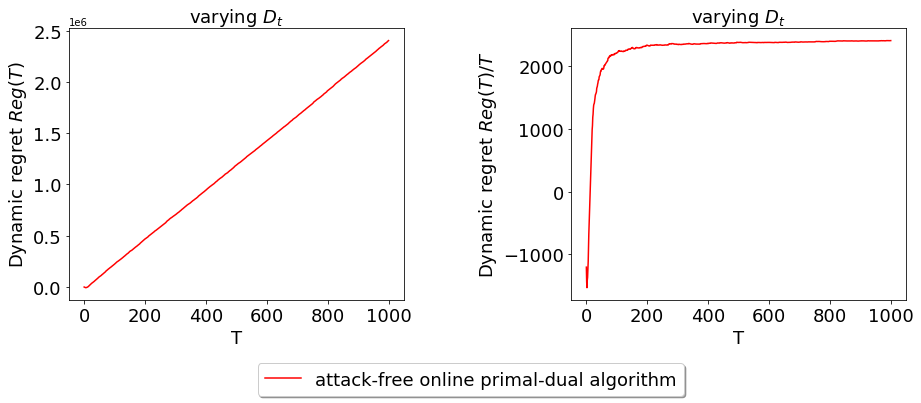

In [14]:
sub1=plt.subplot(1, 2, 1)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,dynamic_regret,color = 'red',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Dynamic regret $Reg(T)$',font2)
plt.title('varying $D_{t}$',font2) 

sub2=plt.subplot(1, 2, 2)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,dynamic_regret_T,color = 'red',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Dynamic regret $Reg(T)/T$',font2)
plt.title('varying $D_{t}$',font2) 

plt.legend(handles=[A],prop={'size':18},loc="upper center", bbox_to_anchor=[-0.3, -0.2],
           ncol=18, shadow=True, fancybox=True)

plt.subplots_adjust(wspace=0.5,hspace=0.5) 
plt.gcf().set_size_inches((15, 5))

#plt.savefig('./figures/01-figure1_dynamic_regret_attack_free_varying_D.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-figure1_dynamic_regret_attack_free_varying_D.png',format='png', bbox_inches='tight')

In [15]:
#累计的约束违反

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [17]:
sum_thermal_wind_power_station_strategy=np.loadtxt("./data/01_small_Gaussian_Byzantine_attack_sum_thermal_wind_power_station_strategy.txt")
d_power_demand=np.loadtxt("./data/d_power_demand_normal_distribution_(70,5).txt")

In [18]:
accumulative_constraint_violation=[]
accumulative_constraint_violation_T=[]
for T in range(1, 1000):
    accumulative_constraint_violation_auxiliary_variable=0
    for t in range(0, T): 
        accumulative_constraint_violation_auxiliary_variable=accumulative_constraint_violation_auxiliary_variable+(1/5)*sum_thermal_wind_power_station_strategy[t+1]-d_power_demand[t+1]
    accumulative_constraint_violation.append(abs(accumulative_constraint_violation_auxiliary_variable))
    accumulative_constraint_violation_T.append(abs(accumulative_constraint_violation_auxiliary_variable)/T)

In [19]:
accumulative_constraint_violation_T

[44.659041904000006,
 47.742987455000005,
 47.67659745733334,
 45.9598778785,
 43.01800927199999,
 39.49849217933333,
 35.75493900085714,
 30.6996046035,
 26.386463477555555,
 23.638973411000002,
 20.316542874000003,
 16.024088405,
 12.559321971692308,
 9.50818267785714,
 6.16942672093333,
 3.4064561564999964,
 1.2373043665882317,
 0.7193264964444483,
 3.0319172633684253,
 4.677876645600004,
 6.049757351047623,
 7.372421678090913,
 8.495954736695657,
 9.33485817508334,
 10.602380737120006,
 11.198791053923081,
 11.649197274740745,
 12.410146960071433,
 12.981142750689662,
 13.703094576733339,
 14.396697005806455,
 14.621120258187505,
 15.118752371939395,
 15.588369344882354,
 16.254876483828575,
 16.763094453222223,
 17.185269847459463,
 18.031839750052637,
 18.536715338205138,
 18.87136268780001,
 19.24247918746342,
 19.363281810428578,
 19.649740363162795,
 20.007722803590916,
 20.30394210755556,
 20.646387490826093,
 20.87798062642554,
 21.14759021504167,
 21.244452700653063,
 21.39

In [20]:
#绘图 accumulative_constraint_violation和accumulative_constraint_violation_T

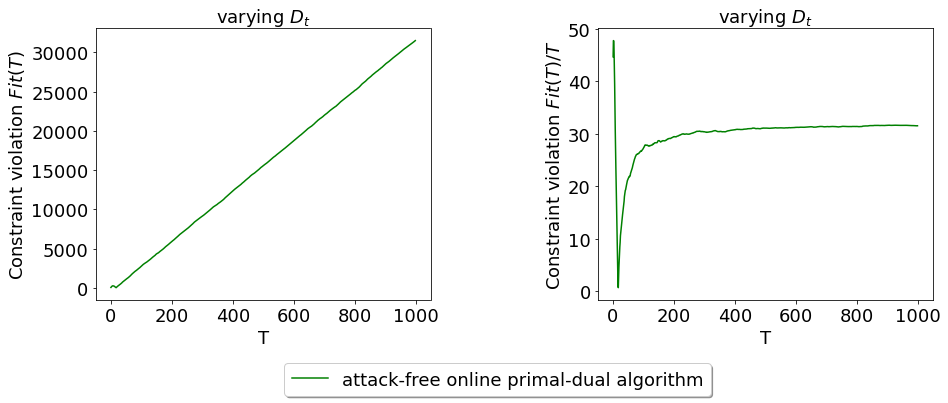

In [21]:
sub1=plt.subplot(1, 2, 1)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,accumulative_constraint_violation,color = 'green',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Constraint violation $Fit(T)$',font2)
plt.title('varying $D_{t}$',font2) 

sub2=plt.subplot(1, 2, 2)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,accumulative_constraint_violation_T,color = 'green',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Constraint violation $Fit(T)/T$',font2)
plt.title('varying $D_{t}$',font2) 

plt.legend(handles=[A],prop={'size':18},loc="upper center", bbox_to_anchor=[-0.3, -0.2],
           ncol=18, shadow=True, fancybox=True)

plt.subplots_adjust(wspace=0.5,hspace=0.5) 
plt.gcf().set_size_inches((15, 5))


#plt.savefig('./figures/01-figure2_constraint_violation_attack_free_varying_D.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-figure2_constraint_violation_attack_free_varying_D.png',format='png', bbox_inches='tight')